In [118]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
# Generate the two moons dataset
X, y = make_moons(n_samples=1024, noise=0.1) # training data
Xv, yv = make_moons(n_samples=1024, noise=0.1) # validation data
Xt, yt = make_moons(n_samples=1024, noise=0.1) # test data

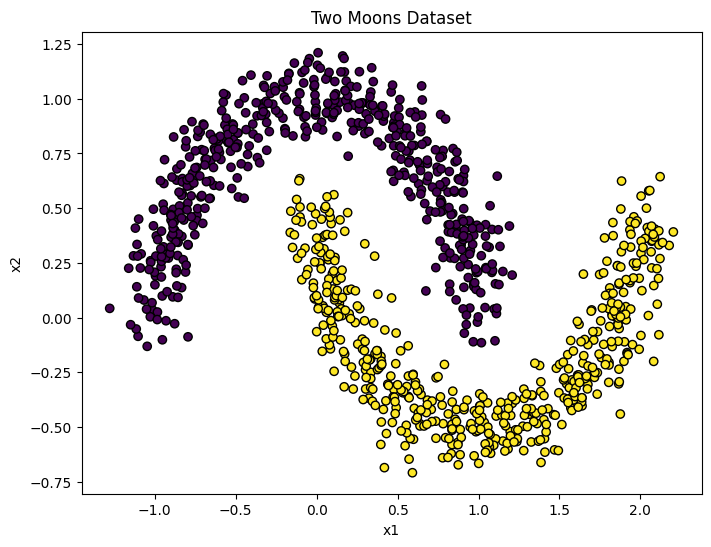

In [119]:
# Plot the dataset

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.viridis, edgecolors='k')
plt.title('Two Moons Dataset')
plt.xlabel('x1')
plt.ylabel('x2')
           
plt.show()

In [120]:
from sklearn.datasets import load_digits
from sklearn import datasets
from torch.utils.data import TensorDataset, Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch 

In [121]:
# Train a classifier that predicts which class each point belongs to and generalizes well to the validation set.
# Describe your network architecture and loss function and all important parameter choices. Visualize the prediction of
# the classifier so that you can see the decision boundaries and adjust your model choices. Generate convergence plots
# for training and validation accuracy during training to detect overfitting.
# After training, report the final training, validation, and test accuracy. Verify that the classifier is confident in low-
# density regions.


X_train = torch.tensor(X, dtype=torch.float32) #train 
y_train = torch.tensor(y, dtype=torch.long)

X_val = torch.tensor(Xv, dtype=torch.float32) #validation
y_val = torch.tensor(yv, dtype=torch.long)

X_test = torch.tensor(Xt, dtype=torch.float32) #test
y_test = torch.tensor(yt, dtype=torch.long)

train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [122]:
class SimpleNN(nn.Module):
    def __init__(self, input_dim=2, hidden_dim=64, output_dim=2):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim // 2)
        self.fc3 = nn.Linear(hidden_dim // 2, output_dim)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [123]:
# defining loss & optimizer 
model = SimpleNN()
criterion = nn.CrossEntropyLoss()  # CE loss
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)  # Adam 

In [124]:
def compute_accuracy(model, data_loader):
    model.eval()
    correct_pred, total = 0, 0
    with torch.no_grad(): 
        for X, y in data_loader: 
            outputs = model(X)
            _, predicted_labels = torch.max(outputs, 1)
            correct_pred += (predicted_labels == y).sum()
            total += y.size(0)
    return correct_pred.float() / total

num_epochs = 50
train_acc_history = []
val_acc_history = []
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for X, y in train_loader:
        optimizer.zero_grad() # using Adam 
        outputs = model(X)
        loss = criterion(outputs, y) #using CE loss
        loss.backward() #backpropagation
        optimizer.step() #update weights


        running_loss += loss.item()
    
    train_acc = compute_accuracy(model, train_loader)
    val_acc = compute_accuracy(model, val_loader)
    train_acc_history.append(train_acc)
    val_acc_history.append(val_acc)

    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {running_loss:.4f}, Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}')



Epoch 10/50, Loss: 2.1809, Train Acc: 0.9844, Val Acc: 0.9834
Epoch 20/50, Loss: 0.4341, Train Acc: 0.9990, Val Acc: 0.9980
Epoch 30/50, Loss: 0.1774, Train Acc: 1.0000, Val Acc: 1.0000
Epoch 40/50, Loss: 0.0957, Train Acc: 1.0000, Val Acc: 1.0000
Epoch 50/50, Loss: 0.0587, Train Acc: 1.0000, Val Acc: 1.0000


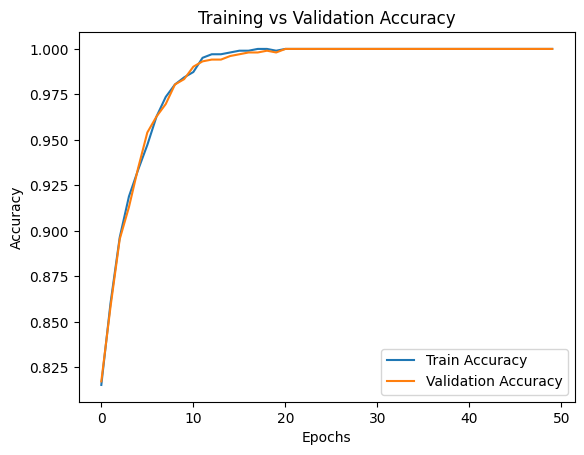

In [125]:
# Generate convergence plots
# for training and validation accuracy during training to detect overfitting.

plt.plot(train_acc_history, label="Train Accuracy")
plt.plot(val_acc_history, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

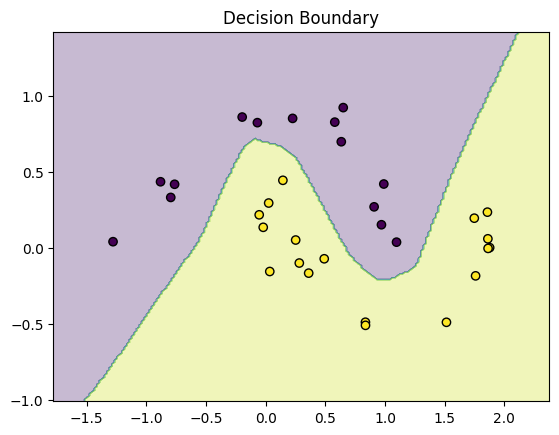

In [126]:
# Visualize the prediction of
# the classifier so that you can see the decision boundaries and adjust your model choices. 

def plot_decision_boundary(model, X, y):
    xx, yy = np.meshgrid(
        np.linspace(X[:,0].min() - 0.5, X[:,0].max() + 0.5, 200),
        np.linspace(X[:,1].min() - 0.5, X[:,1].max() + 0.5, 200)
    )
    
    grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
    
    model.eval()
    with torch.no_grad():
        preds = model(grid).argmax(dim=1).numpy().reshape(xx.shape)

    plt.contourf(xx, yy, preds, alpha=0.3, cmap=plt.cm.viridis)
    plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.viridis, edgecolors="k")
    plt.title("Decision Boundary")
    plt.show()
    
plot_decision_boundary(model, X, y)


In [127]:
# After training, report the final training, validation, and test accuracy. 

train_acc = compute_accuracy(model, train_loader)
val_acc = compute_accuracy(model, val_loader)
test_acc = compute_accuracy(model, test_loader)

print(f"Final Training Accuracy: {train_acc:.4f}")
print(f"Final Validation Accuracy: {val_acc:.4f}")
print(f"Final Test Accuracy: {test_acc:.4f}")

Final Training Accuracy: 1.0000
Final Validation Accuracy: 1.0000
Final Test Accuracy: 0.9980


In [ ]:
# Verify that the classifier is confident in low-
# # density regions.

#  points in a region where there are no training samples
random_points = np.array([
    [5.0, 5.0],  
    [-4.0, 5.0], 
    [6.0, -2.0], 
    [3.5, 3.5],  
])

def check_confidence(model, points):
    model.eval()
    points_torch = torch.tensor(points, dtype=torch.float32)
    with torch.no_grad():
        logits = model(points_torch)
        probs = F.softmax(logits, dim=1)  # Convert logits to probs
    return probs
probs = check_confidence(model, random_points)

print("Confidence in low-density regions:")
for i, point in enumerate(random_points):
    print(f"Point {i+1}: {probs[i].numpy()}")


Confidence in low-density regions:
Point 1: [2.2928602e-04 9.9977070e-01]
Point 2: [1. 0.]
Point 3: [1.3201439e-37 1.0000000e+00]
Point 4: [0.36127937 0.63872063]


In [ ]:
# # 2. Train a flow-based generative model by using maximum likelihood. Use the validation data to choose
# network architecture and hyperparameters. Generate convergence plots showing the training and validation loss during
# training. Also, plot the density estimate and superimpose it with the test samples to demonstrate that the result is
# meaningful, e.g., show that the density away from the training data decays.
# After training, report the final negative log likelihood for the training, validation, and test data, respectively

import torch
import torch.nn as nn
import torch.nn.functional as F

# used chat gpt to write the AffineCoupling and RealNVP bc i was getting dimension errors :(
class AffineCoupling(nn.Module):
    def __init__(self, input_dim, hidden_dim=64):
        super(AffineCoupling, self).__init__()
        self.nn = nn.Sequential(
            nn.Linear(input_dim // 2, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, (input_dim // 2) * 2)  
            # i.e. 2 * 1 = 2 for shift, scale
        )

    def forward(self, x, mask, reverse=False):
        x_masked = x[:, mask.bool()]  
        shift, log_scale = self.nn(x_masked).chunk(2, dim=1)
        scale = torch.exp(log_scale) 
        x_out = x.clone() 
        idx_unmasked = (~mask.bool())

        if not reverse:
            # forward
            x_out[:, idx_unmasked] = (
                x[:, idx_unmasked] * scale + shift
            )
        else:
            # inverse
            x_out[:, idx_unmasked] = (
                (x[:, idx_unmasked] - shift) / scale
            )

        # 4)  log determinant 
        log_det = torch.sum(log_scale, dim=1)  # (N,)

        return x_out, log_det



class RealNVP(nn.Module):
    def __init__(self, input_dim=2, num_flows=4, hidden_dim=64): 
        super().__init__()
        self.flows = nn.ModuleList([AffineCoupling(input_dim, hidden_dim) for _ in range(num_flows)])
        self.masks = []
        for i in range(num_flows):
            if i % 2 == 0:
                self.masks.append(torch.tensor([1,0], dtype=torch.uint8))
            else:
                self.masks.append(torch.tensor([0,1], dtype=torch.uint8))

    def forward(self, x):
        log_det_total = 0
        for flow, mask in zip(self.flows, self.masks):
            mask = mask.to(x.device)
            x, log_det = flow(x, mask, reverse=False)
            log_det_total += log_det
        return x, log_det_total

    def inverse(self, z):
        for flow, mask in reversed(list(zip(self.flows, self.masks))):
            mask = mask.to(z.device)
            z, _ = flow(z, mask, reverse=True)
        return z


        

In [ ]:
import torch.optim as optim

def nll(x, model):
    z, log_det = model(x)  
    log_p_z = -0.5 * torch.sum(z ** 2, dim=1)  # Gaussian prior
    return -torch.mean(log_p_z + log_det)  #nll


# model,  optimizer 
model = RealNVP(input_dim=2, num_flows=4)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Training Loop
num_epochs = 50
train_loss_history = []
val_loss_history = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0

    for batch in train_loader:
        optimizer.zero_grad()
        loss = nll(batch[0], model)  # nll
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    # train loss
    train_loss /= len(train_loader)
    train_loss_history.append(train_loss)

    #  validation loss
    model.eval()
    with torch.no_grad():
        val_loss = nll(X_val, model).item()
    val_loss_history.append(val_loss)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Train NLL: {train_loss:.4f}, Val NLL: {val_loss:.4f}")


Epoch 10/50, Train NLL: -0.3349, Val NLL: 0.0981
Epoch 20/50, Train NLL: -0.4944, Val NLL: -0.4638
Epoch 30/50, Train NLL: -0.5865, Val NLL: -0.2950
Epoch 40/50, Train NLL: -0.6592, Val NLL: -0.5821
Epoch 50/50, Train NLL: -0.6853, Val NLL: -0.5597


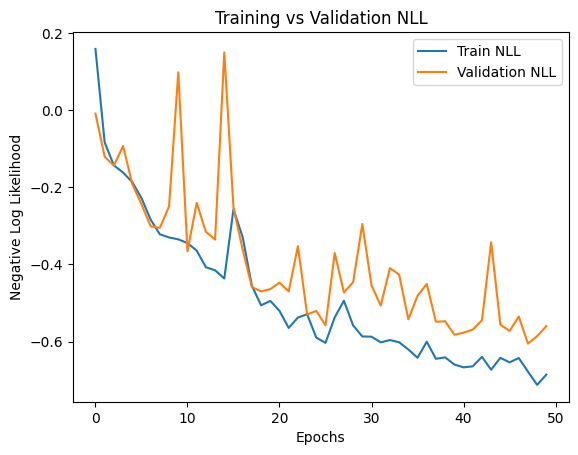

In [131]:
plt.plot(train_loss_history, label="Train NLL")
plt.plot(val_loss_history, label="Validation NLL")
plt.xlabel("Epochs")
plt.ylabel("Negative Log Likelihood")
plt.legend()
plt.title("Training vs Validation NLL")
plt.show()

In [132]:
# After training, report the final negative log likelihood for the training, validation, and test data, respectively

train_nll = nll(X_train, model).item()
val_nll = nll(X_val, model).item()
test_nll = nll(X_test, model).item()

print(f"Final Training NLL: {train_nll:.4f}")
print(f"Final Validation NLL: {val_nll:.4f}")
print(f"Final Test NLL: {test_nll:.4f}")

Final Training NLL: -0.6726
Final Validation NLL: -0.5597
Final Test NLL: -0.5514


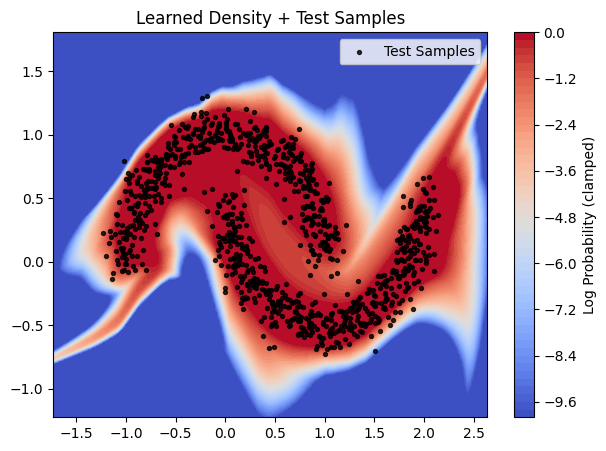

In [ ]:
# Also, plot the density estimate and superimpose it with the test samples to demonstrate that the result is
# meaningful, e.g., show that the density away from the training data decays.

def plot_density(model, X, title):
    if isinstance(X, torch.Tensor):
        X = X.numpy()
    
    xx, yy = np.meshgrid(
        np.linspace(X[:,0].min() - 0.5, X[:,0].max() + 0.5, 200),
        np.linspace(X[:,1].min() - 0.5, X[:,1].max() + 0.5, 200)
    )
    grid_points = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

    with torch.no_grad():
        z, log_det = model(grid_points)
        log_p_z = -0.5 * torch.sum(z ** 2, dim=1)
        log_prob = log_p_z + log_det

    log_prob_np = log_prob.numpy().reshape(xx.shape)

    plt.figure(figsize=(7,5))
    plt.contourf(xx, yy, np.clip(log_prob_np, -10, 0), levels=50, cmap='coolwarm') # i clamped bc i was getting rly big log_prob ... i hope thats ok
    plt.colorbar(label='Log Probability (clamped)')
    
    # Scatter test samples
    plt.scatter(X[:,0], X[:,1], c='black', s=8, alpha=0.8, label='Test Samples')
    plt.title(title)
    plt.legend()
    plt.show()

plot_density(model, X_test, title="Learned Density + Test Samples")



In [134]:
# Now, follow the second approach in the book and think about ways to share some parameters of the
# networks. Discuss your modeling choices, in particular how you weigh the influence of the two terms in the loss
# function. Generate convergence plots showing the training and validation loss during training.
# After training, report the final negative log-likelihood and classification accuracy for the training, validation, and test
# data, respectively. Create similar convergence plots to the previous exercises and compare your results to the naive
# approach. Visualize the decision boundary and density estimate

class SharedEncoder(nn.Module):
    def __init__(self, input_dim=2, hidden_dim=64, output_dim=64): #made a changeeeee to out put 2 - 64 
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, output_dim)  # final output = 2

    def forward(self, x):
        # x: shape (N,2)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)      # shape (N,2)
        return x



In [135]:
class ClassifierHead(nn.Module):
    def __init__(self, input_dim=2, hidden_dim=64, output_dim=2):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
    def forward(self, z):
        x = F.relu(self.fc1(z))
        return self.fc2(x)

In [ ]:
class RealNVP_fixedDim(nn.Module):
    def __init__(self, input_dim=64, num_flows=4, hidden_dim=64):
        super().__init__()
        self.flows = nn.ModuleList([AffineCoupling(input_dim, hidden_dim) for _ in range(num_flows)])
        self.masks = []
        for i in range(num_flows):
            # Create a mask of size that alternates between 1 and 0
            mask = torch.zeros(input_dim, dtype=torch.uint8)
            mask[::2] = 1  # Set even indices to 1
            if i % 2 == 0:
                self.masks.append(mask)
            else:
                self.masks.append(1 - mask)  # Flip the mask for alternating flows

    def forward(self, x):
        log_det_total = 0
        for flow, mask in zip(self.flows, self.masks):
            mask = mask.to(x.device)
            x, log_det = flow(x, mask, reverse=False)
            log_det_total += log_det
        return x, log_det_total

    def inverse(self, z):
        for flow, mask in reversed(list(zip(self.flows, self.masks))):
            mask = mask.to(z.device)
            z, _ = flow(z, mask, reverse=True)
        return z

In [ ]:
class HybridFlowClassifier(nn.Module):
    def __init__(self, encoder, flow, classifier_head, alpha=1.0):
        super().__init__()
        self.encoder = encoder       # shared encoder 
        self.flow = flow             # realnvp flow
        self.classifier_head = classifier_head  # classifier
        self.alpha = alpha

    def forward(self, x, y=None):
        z_shared = self.encoder(x)  
        z_flow, log_det = self.flow(z_shared) 
        log_p_z = -0.5 * torch.sum(z_flow**2, dim=1)  
        gen_nll = -(log_p_z + log_det) 
        logits = self.classifier_head(z_shared) 
        class_nll = None
        if y is not None:
            class_nll = F.cross_entropy(logits, y, reduction='none')  

        return gen_nll, class_nll, logits

    def hybrid_loss(self, x, y):
        gen_nll, class_nll, _ = self.forward(x, y)
        return class_nll.mean() + self.alpha * gen_nll.mean()



In [ ]:
#  models
encoder = SharedEncoder(input_dim=2, hidden_dim=64, output_dim=64) # added whole output 
flow = RealNVP_fixedDim(input_dim=64, num_flows=4, hidden_dim=64) # input 2 to 64
clf_head = ClassifierHead(input_dim=64, output_dim=2)

model = HybridFlowClassifier(encoder, flow, clf_head, alpha=0.5)

optimizer = optim.Adam(model.parameters(), lr=1e-3)

num_epochs = 50
train_loss_history = []
val_loss_history = []

for epoch in range(num_epochs):
    # Train
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        loss = model.hybrid_loss(X_batch, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)

    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for X_val_b, y_val_b in val_loader:
            val_loss += model.hybrid_loss(X_val_b, y_val_b).item()
    val_loss /= len(val_loader)

    train_loss_history.append(train_loss)
    val_loss_history.append(val_loss)

    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}] Train Loss={train_loss:.4f}, Val Loss={val_loss:.4f}")




Epoch [10/50] Train Loss=-127.3731, Val Loss=-134.0599
Epoch [20/50] Train Loss=-141.8054, Val Loss=-122.0334
Epoch [30/50] Train Loss=-117.3873, Val Loss=-135.5735
Epoch [40/50] Train Loss=-145.3661, Val Loss=-118.4330
Epoch [50/50] Train Loss=-136.7892, Val Loss=-70.1108


In [139]:
def compute_accuracy(model, data_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for X_b, y_b in data_loader:
            gen_nll, class_nll, logits = model.forward(X_b, None)
            preds = logits.argmax(dim=1)
            correct += (preds == y_b).sum().item()
            total += y_b.size(0)
    return correct / total

train_acc = compute_accuracy(model, train_loader)
val_acc   = compute_accuracy(model, val_loader)
test_acc  = compute_accuracy(model, test_loader)

print(f"Final Train Acc: {train_acc:.4f}")
print(f"Final Val Acc:   {val_acc:.4f}")
print(f"Final Test Acc:  {test_acc:.4f}")


Final Train Acc: 0.5000
Final Val Acc:   0.5000
Final Test Acc:  0.5000


In [140]:
def compute_gen_nll(model, data_loader):
    model.eval()
    total_nll = 0
    total_pts = 0
    with torch.no_grad():
        for X_b, y_b in data_loader:
            gen_nll, class_nll, _ = model.forward(X_b, None)
            total_nll += gen_nll.sum().item()
            total_pts += X_b.size(0)
    return total_nll / total_pts

train_gnll = compute_gen_nll(model, train_loader)
val_gnll   = compute_gen_nll(model, val_loader)
test_gnll  = compute_gen_nll(model, test_loader)

print(f"Final Train GenNLL: {train_gnll:.4f}")
print(f"Final Val GenNLL:   {val_gnll:.4f}")
print(f"Final Test GenNLL:  {test_gnll:.4f}")


Final Train GenNLL: -141.5585
Final Val GenNLL:   -141.7061
Final Test GenNLL:  -141.7372


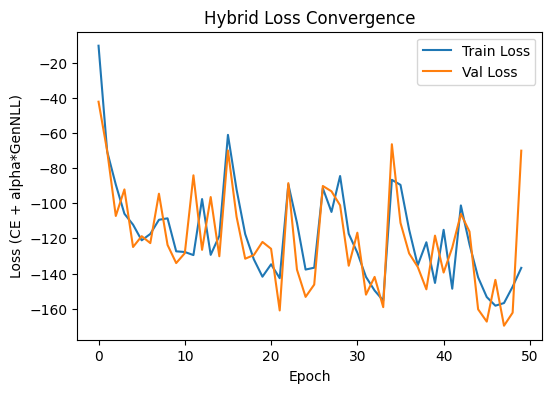

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(train_loss_history, label="Train Loss")
plt.plot(val_loss_history,   label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss (CE + alpha*GenNLL)")
plt.legend()
#
plt.title("Hybrid Loss Convergence")
plt.show()

# Would be interesting to understand all the peaks and troughs 


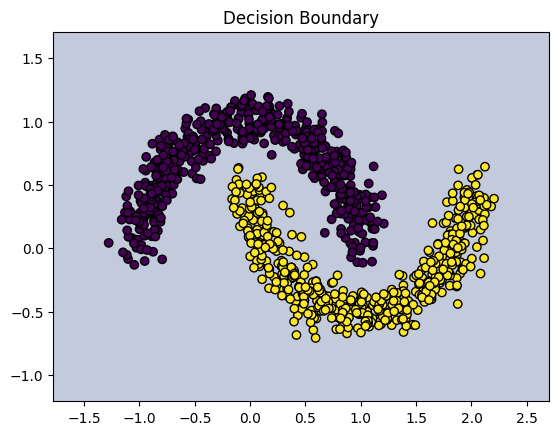

In [ ]:
def plot_decision_boundary(model, X, y):
    xx, yy = np.meshgrid(
        np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 200),
        np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 200)
    )
    grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
    
    model.eval()
    with torch.no_grad():
        _, _, logits = model.forward(grid)
        preds = logits.argmax(dim=1).numpy().reshape(xx.shape)

    plt.contourf(xx, yy, preds, alpha=0.3, cmap=plt.cm.viridis)
    plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.viridis, edgecolors='k')
    plt.title("Decision Boundary")
    plt.show()

plot_decision_boundary(model, X_train, y_train)

#Sometimes this plot has interesting results and sometimes its one color -- definitiely more exploration necessary 


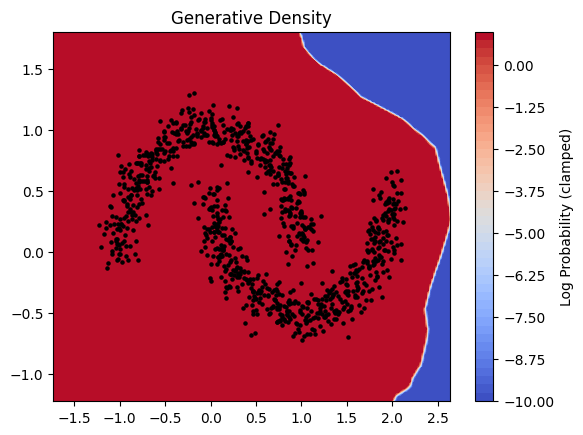

In [ ]:
def plot_density(model, X):
    x_min, x_max = X[:,0].min()-0.5, X[:,0].max()+0.5
    y_min, y_max = X[:,1].min()-0.5, X[:,1].max()+0.5
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)
    )
    grid_pts = np.c_[xx.ravel(), yy.ravel()]
    grid_torch = torch.tensor(grid_pts, dtype=torch.float32)

    with torch.no_grad():
        z_shared = model.encoder(grid_torch)        
        z_flow, log_det = model.flow(z_shared)      
        log_p_z = -0.5 * torch.sum(z_flow**2, dim=1)
        log_prob = log_p_z + log_det

    log_prob_np = log_prob.numpy().reshape(xx.shape)

    clamped_log_prob = np.clip(log_prob_np, -10, 1)  # clamped for visual... not sure abt accuracy 
    plt.contourf(xx, yy, clamped_log_prob, levels=50, cmap='coolwarm')
    plt.colorbar(label='Log Probability (clamped)')
    plt.scatter(X[:,0], X[:,1], c='black', s=5)
    plt.title("Generative Density")
    plt.show()

plot_density(model, X_test)

#Looking at this plot there is prob a lot more that needs to be looked at regarding this model, specifically, what the weights are doing and why. 
